In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords 
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hanzl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hanzl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df = pd.read_csv(r'M:\working_25\Practical\Practical\MLOPS\Day_5\spam.csv', delimiter='\t')
df.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Preprocessings

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Type'] = encoder.fit_transform(df['Type'])

df.head()

,Type,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
len(df)

656

In [29]:
df.isnull().sum()

Type       0
Message    0
dtype: int64

### Feature Engineering

In [30]:
from nltk.stem import PorterStemmer
import string

ps = PorterStemmer()

In [31]:
def clean_text(text):
    text = text.lower()

    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    print(y)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

    


clean_text("Hello, how are you? I am fine, thank you. I am going to the park. what are you doing? nothing special")

['hello', 'how', 'are', 'you', 'i', 'am', 'fine', 'thank', 'you', 'i', 'am', 'going', 'to', 'the', 'park', 'what', 'are', 'you', 'doing', 'nothing', 'special']


'hello fine thank go park noth special'

In [32]:
df['transformed_text'] = df['Message'].apply(clean_text)
df.head()


['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 'apply', '08452810075over18']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'do', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']
['freemsg', 'hey', 'there', 'darling', 'it', 'been', '3', 'week', 'now', 'and', 'no', 'word', 'back', 'i', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'to', 'rcv']
['even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me', 'like', 'aids', 'patent']
['as', 'per', 'your', 'reques

,Type,Message,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(max_features=600)


In [34]:
x = tfid.fit_transform(df['transformed_text']).toarray()
y = df['Type'].values

In [35]:
print(x)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 

### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

### Model Training

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [ ]:
lr = LogisticRegression(solver = "liblinear", penalty = "l1")   
svc = SVC(kernel = "sigmoid", gamma = 1.0, probability = True)
mnb = MultinomialNB()
dt = DecisionTreeClassifier(max_depth = 7)
knn = KNeighborsClassifier(n_neighbors = 1)
rf = RandomForestClassifier(n_estimators = 50, random_state = 2)
adb = AdaBoostClassifier(n_estimators = 50, random_state = 2)
gbc = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
vc = VotingClassifier(estimators = [('lr', lr), ('mnb', mnb), ('svc', svc), ('dt', dt), ('knn', knn), ('rf', rf), ('adb', adb), ('gbc', gbc), ('bc', bc), ('etc', etc)], voting = "soft")
xgb = XGBClassifier(n_estimators = 50, random_state = 2)


clfs = {
    'lr': lr,
    'svc': svc,
    'mnb': mnb,
    'dt': dt,
    'knn': knn,
    'rf': rf,
    'adb': adb,
    'gbc': gbc,
    'bc': bc,
    'etc': etc,
    'vc': vc,
    'xgb': xgb
}


### Model Evaluation

In [40]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report
def train_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


In [41]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    ac, pr = train_model(clf, X_train, y_train, X_test, y_test)
    print(f"{name} - Accuracy: {ac}, Precision: {pr}")
    accuracy_scores.append(ac)
    precision_scores.append(pr)


lr - Accuracy: 0.9242424242424242, Precision: 1.0
svc - Accuracy: 0.9545454545454546, Precision: 1.0
mnb - Accuracy: 0.946969696969697, Precision: 1.0
dt - Accuracy: 0.946969696969697, Precision: 0.875
knn - Accuracy: 0.946969696969697, Precision: 0.875
rf - Accuracy: 0.9696969696969697, Precision: 1.0
adb - Accuracy: 0.946969696969697, Precision: 1.0
gbc - Accuracy: 0.9393939393939394, Precision: 0.7777777777777778
bc - Accuracy: 0.946969696969697, Precision: 0.875
etc - Accuracy: 0.9545454545454546, Precision: 1.0
vc - Accuracy: 0.9621212121212122, Precision: 1.0
xgb - Accuracy: 0.9090909090909091, Precision: 0.5454545454545454


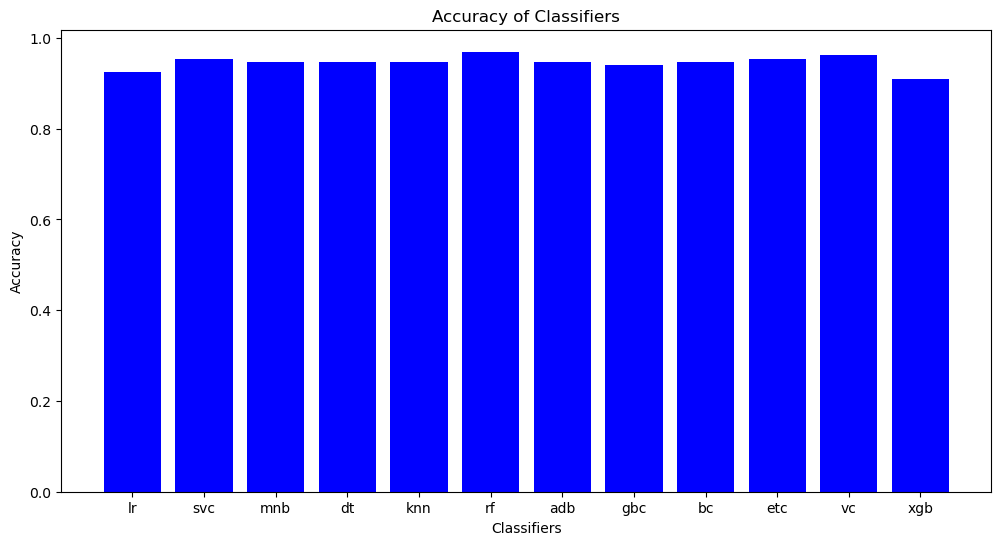

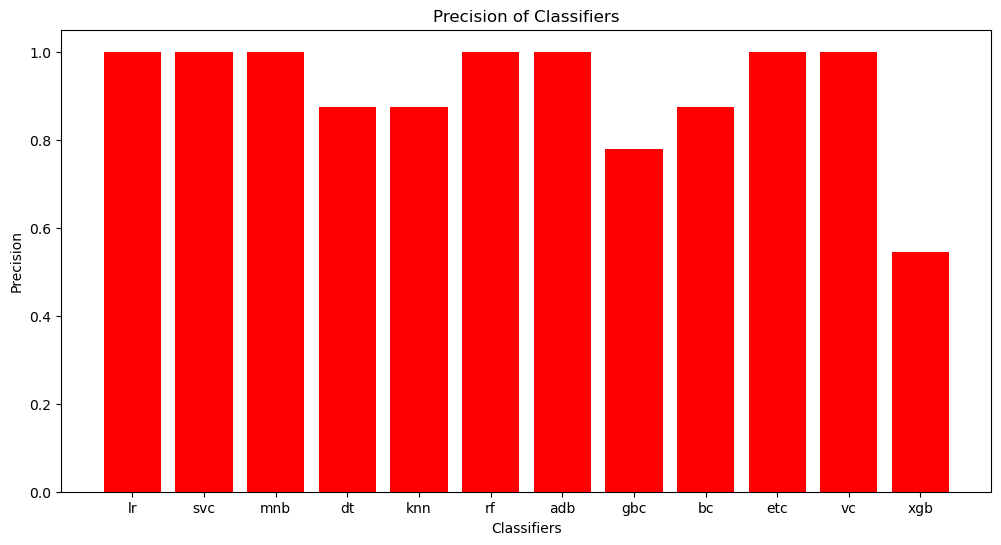

In [42]:
plt.figure(figsize = (12, 6))
plt.bar(clfs.keys(), accuracy_scores, color = "blue")
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy of Classifiers")
plt.show()



plt.figure(figsize = (12, 6))
plt.bar(clfs.keys(), precision_scores, color = "red")
plt.xlabel("Classifiers")
plt.ylabel("Precision")
plt.title("Precision of Classifiers")
plt.show()


### Saving Model

In [43]:
import joblib
import pickle

best_index = accuracy_scores.index(max(accuracy_scores))
best_model_name = list(clfs.keys())[best_index]
best_model = clfs[best_model_name]

best_model.fit(X_train, y_train)

joblib.dump(best_model, f"best_model_{best_model_name}.joblib")
print(f"Best model '{best_model_name}' saved as best_model_{best_model_name}.joblib")

with open(f"best_model_{best_model_name}.pkl", "wb") as f:
    pickle.dump(best_model, f)
print(f"Best model '{best_model_name}' also saved as best_model_{best_model_name}.pkl")

Best model 'rf' saved as best_model_rf.joblib
Best model 'rf' also saved as best_model_rf.pkl
